In [37]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def read_directory(directory_name):
    X,Y= [],[]
    for filename in os.listdir(directory_name):
        image = cv2.imread(directory_name+"/"+filename)
        X.append(image)
        Y.append(int(filename[0]))
    X = np.array(X).astype(np.float64)/255
    Y = np.array(Y)
    return X,Y

In [58]:
X,Y = read_directory("data_set/mnist")
X,X_test,Y,Y_test = X[::2],X[1::2],Y[::2],Y[1::2]
epochs = 100
print(X.shape,Y.shape)

(21000, 28, 28, 3) (21000,)


In [ ]:
model = keras.Sequential(
    [
        keras.layers.Flatten(name = 'IN_PUT',input_shape=(28,28,3,)),
        keras.layers.Dense(units=128,activation='relu',name = 'DENSE_1'),
        keras.layers.Dense(units=10,activation='relu',name = 'DENSE_2'),
        tf.keras.layers.Softmax(name = 'OUT_PUT')
     
    ]
)
model.compile(
            optimizer='adam',
            loss= keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy']
            )
train_history = model.fit(X,Y,epochs=epochs) 
model.summary() 
#model.save('my_model/09999_accuracy_nmist')

Epoch 1/100
657/657 [==============================] - 2s 3ms/step - loss: 0.3202 - accuracy: 0.9038
Epoch 2/100
657/657 [==============================] - 2s 3ms/step - loss: 0.1515 - accuracy: 0.9541
Epoch 3/100
657/657 [==============================] - 2s 3ms/step - loss: 0.1021 - accuracy: 0.9691
Epoch 4/100
657/657 [==============================] - 2s 3ms/step - loss: 0.0728 - accuracy: 0.9779
Epoch 5/100
657/657 [==============================] - 2s 3ms/step - loss: 0.0549 - accuracy: 0.9833
Epoch 6/100
657/657 [==============================] - 2s 3ms/step - loss: 0.0374 - accuracy: 0.9885
Epoch 7/100
657/657 [==============================] - 2s 3ms/step - loss: 0.0299 - accuracy: 0.9914
Epoch 8/100
657/657 [==============================] - 2s 3ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 9/100
657/657 [==============================] - 2s 3ms/step - loss: 0.0234 - accuracy: 0.9935
Epoch 10/100
657/657 [==============================] - 2s 3ms/step - loss: 0.0190 - accura

In [69]:
model.evaluate(X_test,Y_test)
test_list = []
test_jpg = cv2.imread("mnist_test.jpg")
test_list.append(test_jpg)
test_list = np.array(test_list).astype(np.float64)/255
predictions = model.predict(test_list)
print(predictions)
print(np.argmax(predictions[0]))

1/1 [==============================] - 0s 13ms/step
[[2.0071267e-05 2.0071267e-05 1.4693932e-04 2.0071267e-05 2.0071267e-05
  2.9427856e-01 7.0534134e-01 2.0071267e-05 2.0071267e-05 1.1277859e-04]]
6


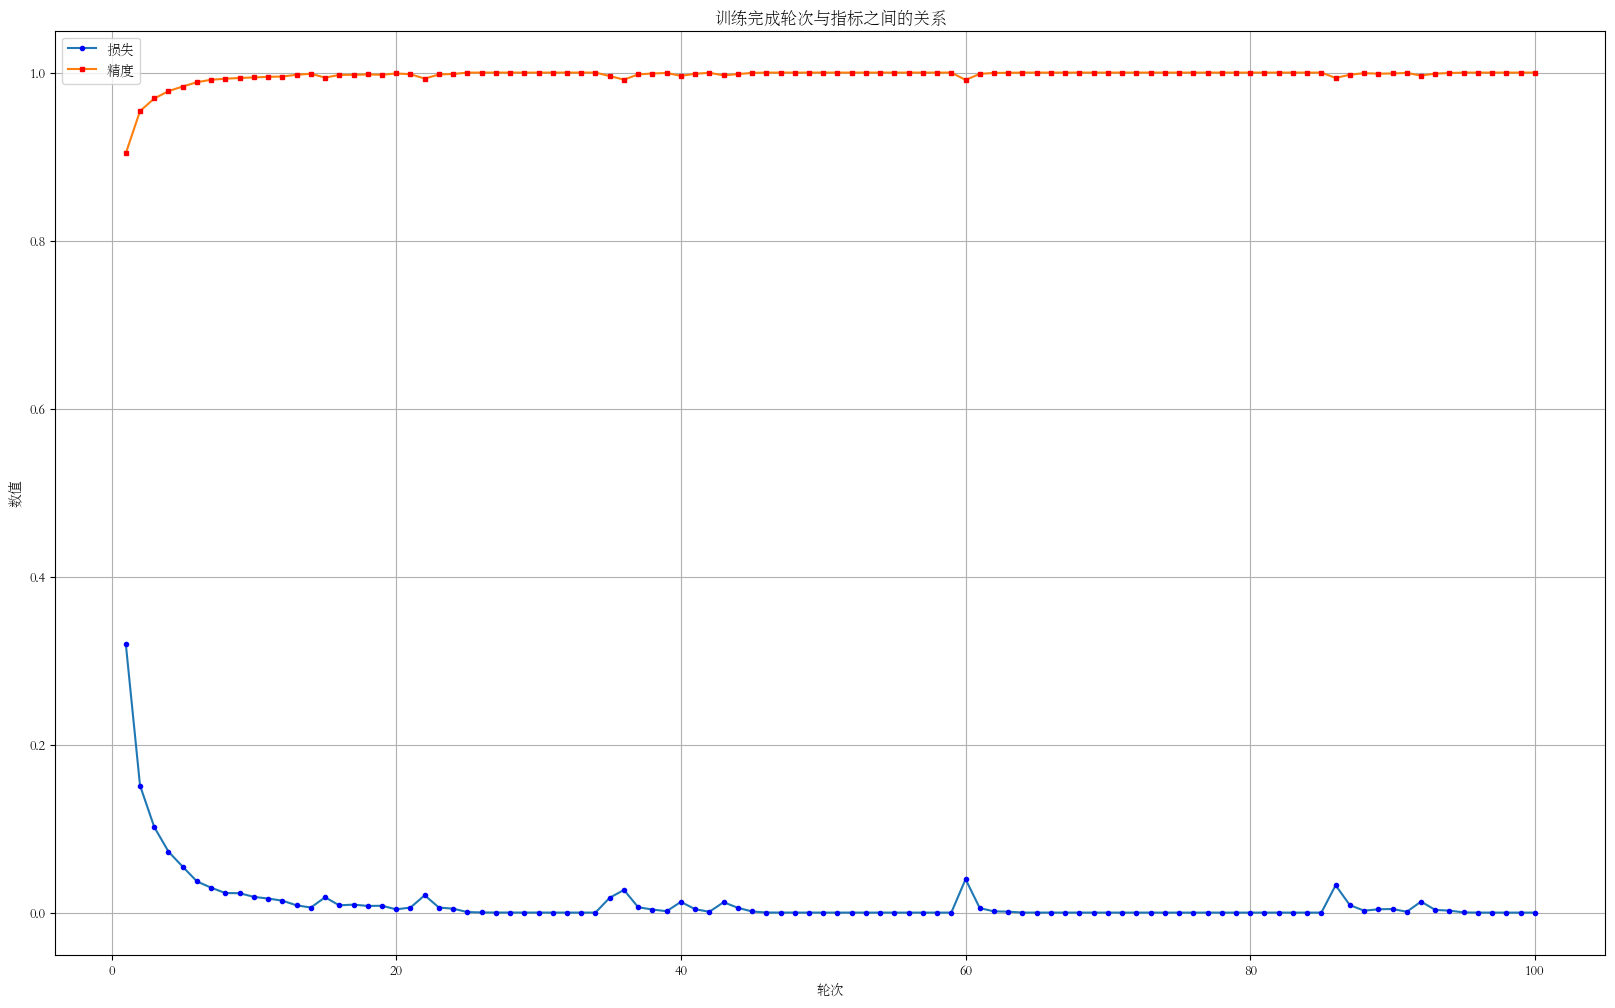

In [79]:
plt.rcParams['font.family'] = 'STSong'
train_time_list = range(1,epochs+1)
plt.figure(figsize=(20, 12))
plt.plot(train_time_list,train_history.history["loss"],'o-',markersize=3, markerfacecolor='blue', markeredgecolor='blue', label='损失')
plt.plot(train_time_list,train_history.history["accuracy"],'s-',markersize=3, markerfacecolor='red', markeredgecolor='red',label='精度')
plt.title('训练完成轮次与指标之间的关系')
plt.xlabel('轮次')
plt.ylabel('数值')
plt.legend()#曲线标识
plt.grid(True)#方格
plt.show()
